In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
PROCESSED_PATH = 'data/heart_processed.csv'


df = pd.read_csv(PROCESSED_PATH)
X = df.drop(columns=['target'])
y = df['target']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_



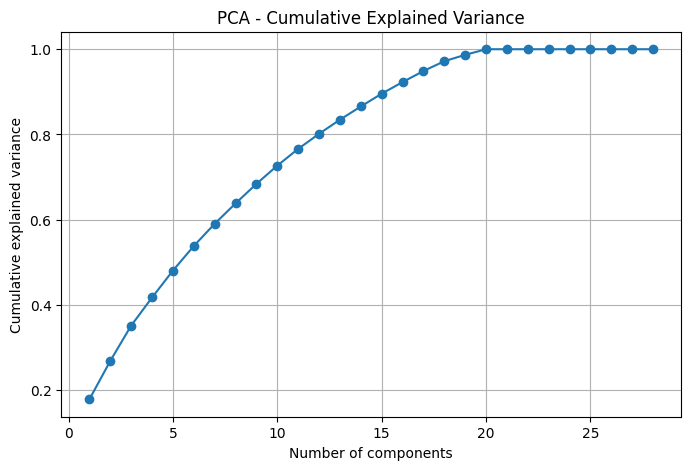

In [5]:

# Plot cumulative explained variance
cumulative = np.cumsum(explained)


plt.figure(figsize=(8,5))
plt.plot(range(1,len(cumulative)+1), cumulative, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [6]:

# Choose number of components keeping 0.9 variance
n_components = np.argmax(cumulative >= 0.90) + 1
print('Components to retain 90% variance:', n_components)


Components to retain 90% variance: 16


In [7]:


# Save PCA-transformed dataset
import joblib
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])
final_df = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)
final_df.to_csv('data/heart_pca.csv', index=False)
joblib.dump(pca_final, 'models/pca_model.pkl')
print('Saved PCA dataset and model.')

Saved PCA dataset and model.
